In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine,reflect = True)

In [7]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = base.classes.measurement
Station = base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

<AxesSubplot:xlabel='date'>

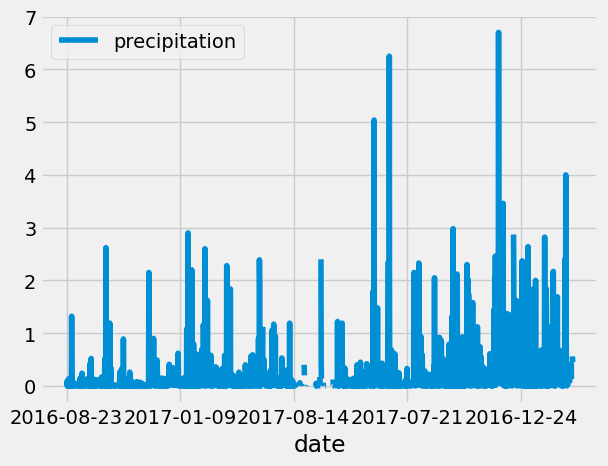

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.
results = []
# Perform a query to retrieve the data and precipitation scores
results = session.query(measurement.date, measurement.prcp).filter(measurement.date >= prev_year).all()
#results = session.query(measurement.date, measurement.prcp)

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(results, columns=['date','precipitation'])

# Sort the dataframe by date
precipitation_df.set_index(precipitation_df['date'], inplace=True)

# Use Pandas Plotting with Matplotlib to plot the dat
precipitation_df.plot()


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9,)]

In [13]:
# What are the most active stations?
session.query(measurement.station, func.count(measurement.station))
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
filter(measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

<AxesSubplot:ylabel='Frequency'>

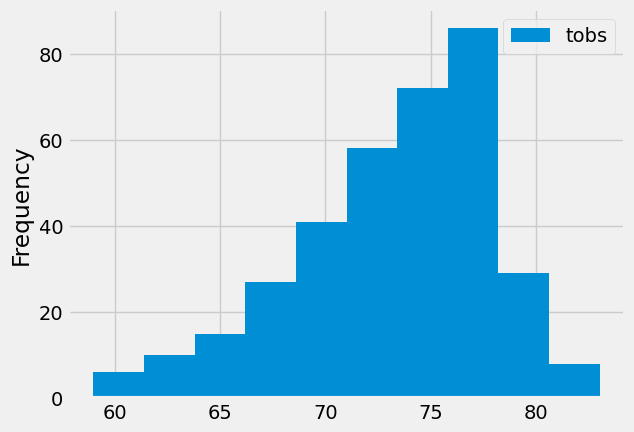

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(measurement.tobs).\
filter(measurement.station == 'USC00519281').\
filter(measurement.date >= prev_year).all()
hist_results = pd.DataFrame(results,columns = ['tobs']) 
hist_results.plot.hist(bins = 10)

In [37]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
cal_temps = session.query(measurement.date, measurement.tobs)
cel_temps_df = pd.DataFrame(cal_temps, columns= ['date','temperatures'])

cel_temps_df['date'] = pd.to_datetime(cel_temps_df['date']).dt.strftime('%Y-%m-%d')
                                                                        
cel_temps_df
                                        

,date,temperatures
0,2010-01-01,65.0
1,2010-01-02,63.0
2,2010-01-03,74.0
3,2010-01-04,76.0
4,2010-01-06,73.0
...,...,...
19545,2017-08-19,71.0
19546,2017-08-20,78.0
19547,2017-08-21,76.0
19548,2017-08-22,76.0


In [47]:
# and return the minimum, average, and maximum temperatures for that range of dates
cal_mean = cel_temps_df['temperatures'].mean()
cal_min = cel_temps_df['temperatures'].min()
cal_max = cel_temps_df['temperatures'].max()
"The minimum temperature is %s. The average temperature is %s. The maximum temperature is %s." % (cal_min, cal_mean, cal_max)


'The minimum temperature is 53.0. The average temperature is 73.09795396419437. The maximum temperature is 87.0.'

# Challenge